In [1]:

import pandas as pd
import numpy as np
import csv
import random
import os
import matplotlib.pyplot as plt
import seaborn
from scipy import stats


player_stats = pd.read_csv("Downloads/NBA Player Stats_2024-25_2.csv")
counts = player_stats.Rk.value_counts()
player_stats_filtered = player_stats[(player_stats["MP"] >= 10.5) & (player_stats["G"] >= 20)]
player_stats_filtered = player_stats_filtered[ ~ (player_stats_filtered.duplicated(subset = "Rk", keep = "last"))]


teams = ["TOR", "PHI", "BOS", "NYK", "BRK", "CHI", "CLE", "IND", "DET", "MIL", "ATL", "CHO", "ORL", "WAS", "MIA", "DEN", "MIN", "POR", "OKC", "UTA", "GSW", "LAC", "LAL", "SAC", "PHO", "MEM", "SAS", "HOU", "DAL", "NOP"]
conference_check = lambda x: "East" if x in teams[0:15] else "West"
division_check = lambda x : "Atlantic" if x in teams[0:5] else ("Central" if x in teams[5:10] else ("Southeast" if x in teams[10:15] else( "Northwest" if x in teams[15:20] else( "Pacific" if x in teams[20:25] else "Southwest"))))

player_stats_filtered["Conference"] = player_stats_filtered.Team.apply(conference_check)
player_stats_filtered["Division"] = player_stats_filtered.Team.apply(division_check)
player_stats_filtered["3P%"] = player_stats_filtered["3P%"] * 100
player_stats_filtered["FG%"] = player_stats_filtered["FG%"] * 100
player_stats_filtered["2P%"] = player_stats_filtered["2P%"] * 100
player_stats_filtered["eFG%"] = player_stats_filtered["eFG%"] * 100
player_stats_filtered["FT%"] = player_stats_filtered["FT%"] * 100
player_stats_filtered["3P%"] = player_stats_filtered["3P%"].replace(np.NaN, 0)


number_of_guesses_list = []

In [15]:
def poeltl_game(data):
    index = random.randint(1, len(data))
    correct_player = data.iloc[index].Player
    guesses_left = 8
    hints_left = 3
    guesses_took = 1
        
    def mpg(player):
        df = data[data["Player"] == player]
        percentile = stats.percentileofscore(data["MP"], df.MP.iloc[0])
        rounded_percentile = round(percentile)
        print("The correct player's minutes per game is equal to or greater than " + str(rounded_percentile) + "% of all NBA players.")
    
    def assists(player):
        plt.scatter(x = data.AST, y = data.TOV)
        plt.xlabel("Average Assists")
        plt.ylabel("Average Turnover")
        plt.title("Average Assists vs. Average Turnover for Every NBA Player")
        df = data[data["Player"] == player]
        plt.scatter(df.AST, df.TOV, color = 'red')
        plt.show()
        plt.close()
        print("The scatterplot above shows the average assists and average turnovers for every player in the 2024 - 2025 season. Each dot represents one player and the correct player and their assists/turnover statistics. The correct player is in red!")
    
    def ppg(player):
        df = data[data["Player"] == player]
        n, bins, patches = plt.hist(x = data["PTS"], edgecolor = "gray", bins = np.arange(0, data.PTS.max() + 5, 5))
        plt.xlabel("Average Points Per Game")
        plt.ylabel("Number of Players")
        plt.title("Average Points per Game in 2024 - 2025")
        for i in range(len(patches)):
            if bins[i] <= df.PTS.iloc[0] < bins[i+1] :
                patches[i].set_facecolor("lightblue")
        plt.show()
        plt.close()
        print("The graph above shows how many players fall into each points per game range. The range the correct player's points per game falls in is highlighted in light blue!")
    
    def threes(player):
        df = data[data["Player"] == player]
        percentile = stats.percentileofscore(data["3P%"], df["3P%"].iloc[0])
        rounded_percentile = round(percentile)
        print("The correct player's three point percentage is equal to or greater than " + str(rounded_percentile) + "% of all NBA players.")

    hint_pool = [mpg, ppg, threes, assists]
    
    print('''Welcome to the Poetl Game!\nYou have eight chances to guess the NBA player we're thinking of.
    \nStart by guessing a player.
    \nIf the player is correct, you win!
    \nIf not, we'll tell you if your guess' team, conference, division, position, or age are correct.
    \nYou also have three hints to help you narrow down your guesses. If you'd like to use one, type in "hint".
    \nGood luck!''')

    
    for i in range(0, 100):
        if guesses_left == 0:
            guesses_took = 8
            number_of_guesses_list.append(guesses_took)
            break
            
        user_guess = str(input("Guesses remaining: " + str(guesses_left) + ". Please make your guess."))
        
        if user_guess == "hint":
            if hints_left == 0:
                print("Sorry, you have no more hints left. Please make a guess.")
            else:
                hints_left -= 1
                hint = random.choice(hint_pool)
                hint(correct_player)
                hint_pool.remove(hint)

        elif user_guess not in data["Player"].values:
            print("Your guess didn't play significant games or minutes in the 2024 - 2025 NBA season. Try again!")
            
                        
        else:
            if user_guess == correct_player:
                print("You win! You guessed correctly!")
                number_of_guesses_list.append(guesses_took)
                break
            else:
                print("Your guess is wrong.")
                
                attributes = ["Team", "Conference", "Division", "Pos", "Age"]

                guess_row = data.loc[data["Player"].str.lower() == user_guess.lower()].iloc[0]
                correct_row = data.loc[data["Player"] == correct_player].iloc[0]
                
                guess_stats = []
                
                for attr in attributes:
                    if guess_row[attr] == correct_row[attr]:
                        guess_stats.append(attr + ": " + str(correct_row[attr]))
                
                print("But your guess and the correct player have these attributes in common: " + str(guess_stats))
                guesses_left -= 1
                guesses_took += 1
                
                
    print( "The correct player was " + correct_player)
    for guess in number_of_guesses_list:
        if guess > 8:
            number_of_guesses_list.remove(guess)
            
    guesses_took_by_round = pd.DataFrame({"Guesses Took" : number_of_guesses_list})
    seaborn.countplot(x = "Guesses Took", data = guesses_took_by_round, order = range(1, 9))
    plt.title("Guess Distribution")
    plt.show()



In [ ]:
print(poeltl_game(player_stats_filtered))

Welcome to the Poetl Game!
You have eight chances to guess the NBA player we're thinking of.
    
Start by guessing a player.
    
If the player is correct, you win!
    
If not, we'll tell you if your guess' team, conference, division, position, or age are correct.
    
You also have three hints to help you narrow down your guesses. If you'd like to use one, type in "hint".
    
Good luck!


Guesses remaining: 8. Please make your guess. trae young


Your guess didn't play significant games or minutes in the 2024 - 2025 NBA season. Try again!


Guesses remaining: 8. Please make your guess. Trae Young


Your guess is wrong.
But your guess and the correct player have these attributes in common: ['Conference: East']


Guesses remaining: 7. Please make your guess. Myles Turner


Your guess is wrong.
But your guess and the correct player have these attributes in common: ['Conference: East', 'Pos: C']


Guesses remaining: 6. Please make your guess. Scottie Barnes


Your guess is wrong.
But your guess and the correct player have these attributes in common: ['Conference: East', 'Division: Atlantic']


Guesses remaining: 5. Please make your guess. Nic Claxton


Your guess is wrong.
But your guess and the correct player have these attributes in common: ['Conference: East', 'Division: Atlantic', 'Pos: C', 'Age: 25']


Guesses remaining: 4. Please make your guess. Mitchell Robinson


Your guess didn't play significant games or minutes in the 2024 - 2025 NBA season. Try again!


Guesses remaining: 4. Please make your guess. Adem Bona


Your guess is wrong.
But your guess and the correct player have these attributes in common: ['Conference: East', 'Division: Atlantic', 'Pos: C']


26
23
Trae Young
26
ATL
PG
76
76
36.0
7.4
18.1
0.411
2.9
8.4
0.34
4.6
9.7
0.474
0.491
6.5
7.4
0.875
0.5
2.6
3.1
11.6
1.2
0.2
4.7
1.9
24.2
East
Southeast


In [841]:
similarity_score = (len(guess_stats)/5) * 100

NameError: name 'guess_stats' is not defined

     index   Rk              Player  Age Team Pos   G  GS    MP   FG  ...  \
22      26   23          Trae Young   26  ATL  PG  76  76  36.0  7.4  ...   
56      66   59       Jalen Johnson   23  ATL  SF  36  36  35.7  7.5  ...   
105    125  108       Dyson Daniels   21  ATL  SG  76  76  33.8  6.0  ...   
114    136  119      Onyeka Okongwu   24  ATL   C  74  40  27.9  5.2  ...   
126    153  131  Zaccharie Risacher   19  ATL  SF  75  73  24.6  4.8  ...   
137    166  142        Caris LeVert   30  ATL  SG  26   0  26.6  5.6  ...   
185    230  194       Georges Niang   31  ATL  PF  28   2  23.0  4.3  ...   
220    276  230        Clint Capela   30  ATL   C  55  41  21.4  4.0  ...   
239    300  250     Larry Nance Jr.   32  ATL  PF  24   3  19.3  3.3  ...   
255    329  269        Terance Mann   28  ATL  SG  30   1  22.7  3.9  ...   
259    336  274    Garrison Mathews   28  ATL  SG  47   2  17.7  2.2  ...   
270    351  287          Vit Krejci   24  ATL  PG  57  16  20.2  2.5  ...   

131


     index   Rk              Player  Age Team Pos   G  GS    MP   FG  ...  \
146    178  152       Corey Kispert   25  WAS  SF  61   0  26.3  4.2  ...   
148    180  154      Toumani Camara   24  POR  PF  78  78  32.7  4.2  ...   
149    181  155  Isaiah Hartenstein   26  OKC   C  57  53  27.9  4.9  ...   

     DRB   TRB  AST  STL  BLK  TOV   PF   PTS  Conference   Division  
146  2.4   3.0  1.7  0.4  0.2  1.0  1.6  11.6        East  Southeast  
148  3.6   5.8  2.2  1.5  0.6  1.4  2.9  11.3        West  Northwest  
149  7.9  10.7  3.8  0.8  1.1  1.7  3.0  11.2        West  Northwest  

[3 rows x 33 columns]


     index   Rk              Player  Age Team Pos   G  GS    MP   FG  ...  \
22      26   23          Trae Young   26  ATL  PG  76  76  36.0  7.4  ...   
56      66   59       Jalen Johnson   23  ATL  SF  36  36  35.7  7.5  ...   
105    125  108       Dyson Daniels   21  ATL  SG  76  76  33.8  6.0  ...   
114    136  119      Onyeka Okongwu   24  ATL   C  74  40  27.9  5.2  ...   
126    153  131  Zaccharie Risacher   19  ATL  SF  75  73  24.6  4.8  ...   
137    166  142        Caris LeVert   30  ATL  SG  26   0  26.6  5.6  ...   
185    230  194       Georges Niang   31  ATL  PF  28   2  23.0  4.3  ...   
220    276  230        Clint Capela   30  ATL   C  55  41  21.4  4.0  ...   
239    300  250     Larry Nance Jr.   32  ATL  PF  24   3  19.3  3.3  ...   
255    329  269        Terance Mann   28  ATL  SG  30   1  22.7  3.9  ...   
259    336  274    Garrison Mathews   28  ATL  SG  47   2  17.7  2.2  ...   
270    351  287          Vit Krejci   24  ATL  PG  57  16  20.2  2.5  ...   

Empty DataFrame
Columns: [Rk, Player, Age, Team, Pos, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Conference, Division]
Index: []
Empty DataFrame
Columns: [Rk, Player, Age, Team, Pos, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Conference, Division]
Index: []
Empty DataFrame
Columns: [Rk, Player, Age, Team, Pos, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Conference, Division]
Index: []
Empty DataFrame
Columns: [Rk, Player, Age, Team, Pos, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Conference, Division]
Index: []
Empty DataFrame
Columns: [Rk, Player, Age, Team, Pos, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Conference, Divis

169    0.0
Name: 3P%, dtype: float64


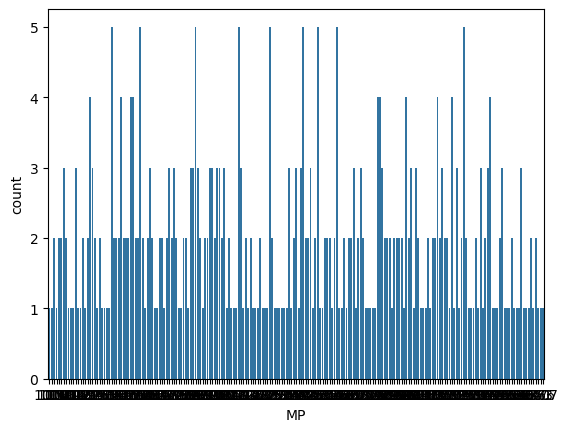

The correct player's three point percentage is equal to or greater than 41% of all NBA players.
None
41.358024691358025


True False
